In [1]:
import sys
sys.path.append('../')
from utils.config_utils import get_config
from utils.toolkit_utils import get_toolkit_dataset
import matplotlib.pyplot as plt
import numpy as np

/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
config = get_config()

In [3]:
sessions = [
   't11.2021.07.13',
   't11.2021.07.20',
   't11.2021.07.27',
   't11.2021.07.30',
   't11.2021.08.13',
   't11.2021.08.16',
   't11.2021.08.26',
   't11.2021.09.02',
   't11.2021.09.08',
   't11.2021.09.20',
   't11.2021.10.14',
   't11.2021.10.21',
   't11.2021.11.02',
   't11.2021.11.15',
   't11.2021.12.02'
]

In [4]:
data = []

for idx, session in enumerate(sessions):
    dataset = get_toolkit_dataset(config, session)
    test, _ = dataset.get_pair_xcorr('spikes', threshold=config.data.xcorr_thesh, zero_chans=True)
    data.append((idx, session, np.vstack( test )))

/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dmifsud/miniconda3/envs/rt-ndt/lib/python3.9/site-packages/

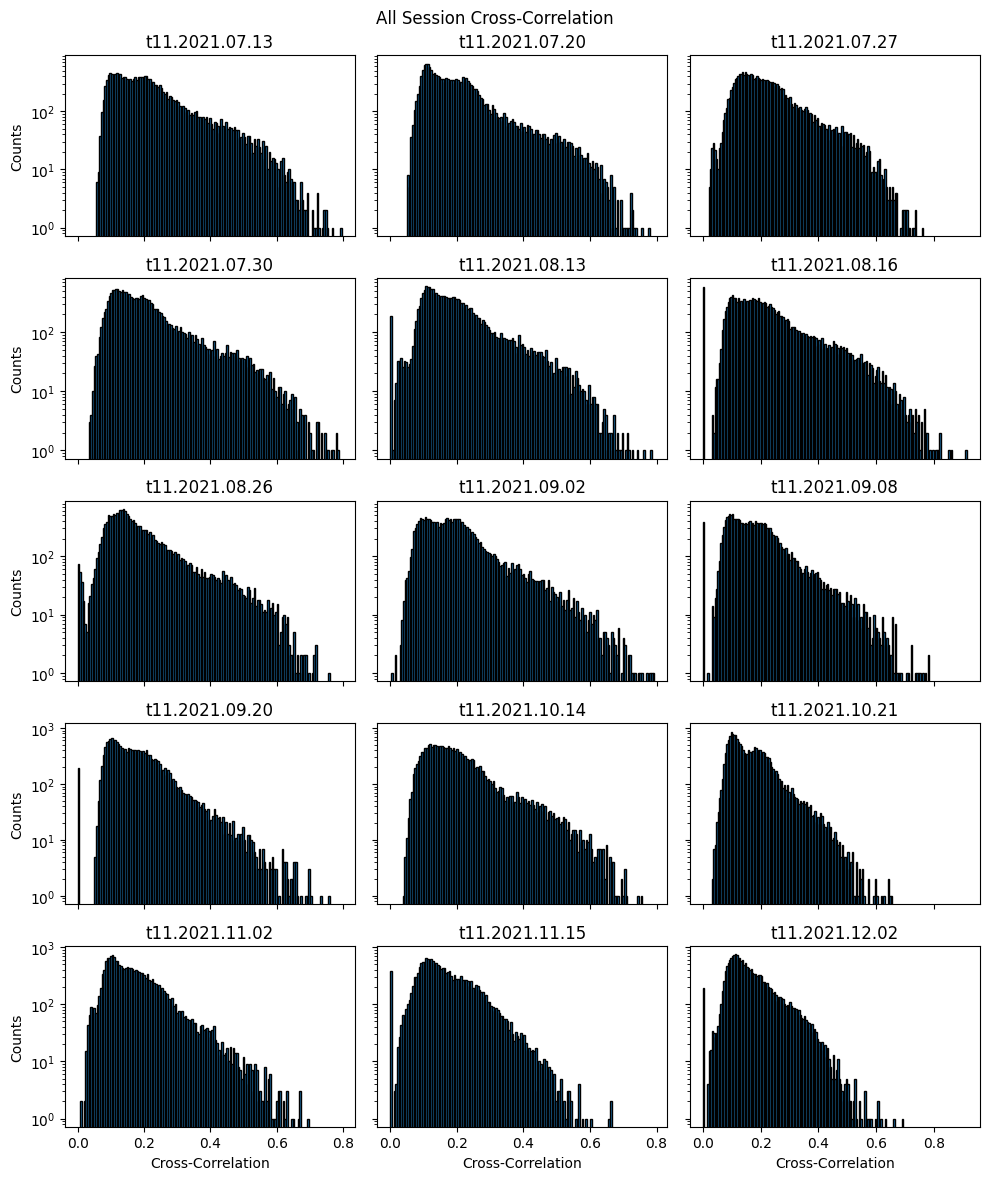

In [5]:
n_plots = len(sessions)
n_cols = 3
n_rows = (n_plots // n_cols) + (1 if n_plots % n_cols != 0 else 0)
hist_binwidth = 0.005

fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 12), sharex='col', sharey='row')

for idx, session, data_ in data:
    axs.flat[idx].hist(data_, bins=np.arange( min(data_), max(data_) + hist_binwidth, hist_binwidth ), edgecolor='black')
    axs.flat[idx].set_title(session)

for ax in axs.flat: 
    ax.set(xlabel='Cross-Correlation', ylabel='Counts')
    ax.set_yscale("log")
for ax in axs.flat: ax.label_outer()

plt.suptitle('All Session Cross-Correlation')
plt.tight_layout()

plt.savefig(f'images/all_session_cross_corr', facecolor='white', transparent=False)

plt.show()